# Sentiment Analysis and Collocation of Reviews

In this notebook we apply two techniques to the reviews for the Boston-area AirBnBs in our dataset: sentiment analysis and collocation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("max_columns", None)

reviews = pd.read_csv("reviews.csv")
listings = pd.read_csv("listings.csv")

## Airbnb aspect ontology: 
space, experience_offered,neighborhood_overview, transit, access, interaction, house_rules 
- affective expressions? summary 
- description ?
- geo: stree,.....


In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## Sentiment Analysis

First we note the highly skewed distribution of reviews on the Internet: many many positives, not many negatives. This holds just as true on AirBnB as everywhere else.

<AxesSubplot:>

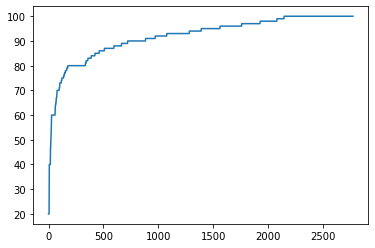

In [4]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

There's an XKCD for this.

In [ ]:
from IPython.display import Image

Image("https://imgs.xkcd.com/comics/star_ratings.png")

Ok, let's try out sentiment analysis.

Sentiment analysis is a technique in natural language processing which aims to retrieve the "sentiment" of a piece of text&mdash;positive, negative, or neutral. This is an easy way of summarizing the contents of a piece of text, and one that is easily understood.

Note, however, that sentiment analysis is a difficult problem. Humans agree on the sentiment of sentences only 80% of the time, and the best classifiers can get around that level of accuracy, but we're going to just use a built-in analyzer in the `nltk` (natural language toolkit) Python library.

So I don't expect our results to be astonishingly good, but let's see what we get...

In [10]:
import nltk
# nltk.download('vader_lexicon')
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shukai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)
compound: 0.9626, neg: 0.0, neu: 0.648, pos: 0.352, 
Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away
compound: 0.9061, neg: 0.0, neu: 0.639, pos: 0.361, 
We really enjoyed our stay at Islams house. From the outside the house didn't look so inviting but the inside was very nice! Even though Islam himself was not there everything was prepared for our arrival. The airport T Station is only a 5-10 min walk away. The only little issue was that all the people in the house had to share one bathroom. But it was not really a problem and it worked out fine. We would recommend Islams place for a stay in Boston. 
compound: 0.9663, neg: 0.0, neu: 0.767, pos:

Our reviews contain both null reviews and reviews in other languages. [langdetect](https://github.com/Mimino666/langdetect) makes this trivially easy, but it doesn't install on Kaggle for whatever reason. `nltk` can do this too, but for whatever reason it doesn't have a built-in for it. We'll use the following bit of code to filter out non English-language reviews, borrowed from elsewhere:

In [12]:
# Snippet from:
# http://h6o6.com/2012/12/detecting-language-with-python-and-the-natural-language-toolkit-nltk/

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [11]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

Generate our scores.

In [14]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

How do we score on...

**Neutrality**

In [ ]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

**Positivity**

In [ ]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

**Negativity**.

Almost none of the texts are classified as having significant amounts of negativity! In fact, a significant amount of them are given exactly 0.0 negativity.

In [ ]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

These charts tell us about the characteristics of the off-the-shelf sentiment classifier that we are used and its performance on our dataset. Although the compound score is supposed to be the best estimate of overall sentiment (not shown in the charts above), the fact that negativities are ranked so lowly hints that we're doing a not so great job with this.

In [ ]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [ ]:
scored_reviews.head()

Let's look at our positive-negativity reviews. A lot of these aren't negative at all.

In [ ]:
scored_reviews.query('negativity > 0')

Here are two that are:

In [ ]:
scored_reviews.iloc[23]['review']

In [ ]:
scored_reviews.iloc[28]['review']

Some more fiddling with queries...

In [ ]:
scored_reviews.query('negativity > positivity').query('negativity > 0.1')

In [ ]:
scored_reviews.query('negativity > positivity').query('compound < -0.2')

Here's an example of the kind of (funny, sarcastic) review that seriously trips our classifier up:

In [ ]:
scored_reviews.iloc[1181]['review']

Here's another one. In this text's case even though we would say the sentiment with regards to the *lister* is positive, the sentiment of the overall paragraph is *negative* because of the renter's unfortunate experience with food poisoning, being "horrendously sick", etc.

This is a limitation inherent in all sentiment classification tasks. The best way to get around this is to use a technique called chunking to extract what sentiment is attached to what thing in the text, but that gets complicated very quickly.

In [ ]:
scored_reviews.iloc[63836]['review']

Here are two more bad reviews because why not:

In [ ]:
scored_reviews.iloc[62984]['review']

In [ ]:
scored_reviews.iloc[198]['review']

We'll actually stop here. It's pretty clear that our sentiment analyzer is not doing a good enough job separating the wheat from the chaff to use our results for anything! That's unfortunate, but understandable.

There's a number of pre-processing techniques that we could apply to our dataset to make our sentiment analyzer work better (Google it!). We could also try a different sentiment analyzer (like the IBM or HP ones, available via API), particularly one perhaps better suited for the "Internet reviews" domain, and see if that would get better results.

## Collocation

According to Wikipedia "a collocation is a sequence of words or terms that co-occur more often than would be expected by chance." What we want to attempt now is to use `nltk` to find collocations which have a high amount of importance in the text, and we'd like to take and display them as "summaries" of our texts.

How do we tell when a particular combination of words is important? One way of doing it is look at those word's [pointwise mutual information](https://en.wikipedia.org/wiki/Pointwise_mutual_information).  This is a metric which attached significance to words which appear next to one another in the text, for whom such co-occurrences are far-above-averagely-common, and which are otherwise rarely used in the language. According to this metric, for example, the words "puerto" and "rico" have a very high PMI, while the words "to" and "in" have a very low one.

If you use Yelp! a lot you are probably familiar with Yelp's so-called [review highlights](https://www.yelp-support.com/article/What-are-Review-Highlights?l=en_US). These kick in after a location has had a certain reasonably large amount of reviews written, and show, by default, snippets of three reviews mentioning a combination of words which appears especially often in reviews for the location. [Here's an example](https://www.yelp.com/biz/chelsea-market-new-york) of these highlights in action.

An answer on StackOverflow says that these highlights are probably implemented using [precisely the techniques spoken about above](http://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries). What we're going to now try and do is replicate Yelp! review highlights with AirBnB review highlights!

In [ ]:
reviews_df = reviews[reviews.apply(lambda srs: pd.notnull(srs['comments']) and (get_language(srs['comments']) == 'english'), axis='columns')]

Let's try and find interesting word combinations for an example listing, just to see if it's possible. In this case we're picking an ID with 200 reviews to it, a substantial number which should hopefully let us mine good subject commonalities between them.

Note that in this case our "combinations of words" means bigrams: pairs of two words which appear right next to each other in the text. This can be extended to n-grams of arbitrary size, if you're so inclined, and Yelp! uses n-gram sizes between 1 and 3, but for simplicity's sake we're going to stick to bigrams (2-grams) here.

In [ ]:
example_listing_reviews = reviews_df.query('listing_id == 1178162')

In [ ]:
len(example_listing_reviews)

In [ ]:
from nltk import word_tokenize

In [ ]:
words = np.concatenate(np.array([word_tokenize(r) for r in example_listing_reviews['comments'].values]))

In [ ]:
words

In [ ]:
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)

finder.apply_freq_filter(3) 
finder.nbest(bigram_measures.pmi, 10)  

Ok great. How many reviews do we have to work with per location?

In [ ]:
reviews_df.groupby('listing_id')['comments'].count().plot(kind='hist', bins=20)

To process the words we're going to use a `BigramCollocationFinder`, which expects all of the text from our reviews, tokenized into individual words, as input. To do that we're going to use the `nltk` `word_tokenize` method on the words, then run a couple of maps on the result to tweak a couple of things: remove punctionation marks and recombine contractions that `word_tokenize` splits up (`word_tokenize` will render `didn't` as `["did", "n't"]` for example, which we don't want.

In [ ]:
review_words = reviews_df.groupby('listing_id').apply(
    lambda df: np.concatenate(np.array([word_tokenize(r) for r in df['comments'].values]))
)

In [ ]:
import string

ex = ['Hi', 'there', '.', '?', '!', ',']
[w for w in ex if w not in string.punctuation]

In [ ]:
review_words_f = review_words.map(lambda arr: np.array([w for w in arr if w not in string.punctuation]))

In [ ]:
review_words_f.head()

In [ ]:
def reattach_contractions(wordlist):
    words = []
    for i, word in enumerate(wordlist):
        if word[0] == "'" or word == "n't":
            words[-1] = words[-1] + word
        else:
            words.append(word)
    return words

In [ ]:
review_words_f = review_words_f.map(reattach_contractions)

Ok great! Let's see how many words we're working with for each of our reviews.

In [ ]:
review_words_f.map(len).plot(kind='hist', bins=20)

There's going to be some sort of cut-off in terms of the number of words that, were we to use this result in production, we would need to find. Yelp! seems to put that cutoff at 20 or so reviews; below that there's not enough information for highlighting to work.

Not knowing any more about how they do things, we're just going to apply our collocation finder to all of the review texts. First we're going to retrieve a list of bigrams that appear in the review text at least three times. Then we'll pick the three "best" bigrams, where "best" means the large PMI.

That's what the function below does.

In [ ]:
# from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder

def bigramify(words):
    finder = BigramCollocationFinder.from_words(words)
    finder.apply_freq_filter(3) 
    return finder.nbest(bigram_measures.pmi, 3)

review_bigrams = review_words_f.map(bigramify)

Let's see what our results look like!

In [ ]:
review_bigrams.head(20)

Not bad! It could definitely use improvement, but we're already seeing some interesting topics recur here.

Let's generate "Yelp! style" top-level highlights and print them to see what we get.

In [ ]:
def sample_reviews(listing_id):
    bigrams = review_bigrams[listing_id]
    review_texts = reviews[reviews['listing_id'] == listing_id]['comments'].values
    sample_reviews = []
    for bigram in bigrams:
        sample_review_list = list(filter(lambda txt: " ".join(bigram) in txt, review_texts))
        num_reviews = len(sample_review_list)
        sample_review = sample_review_list[0]
        sample_review = sample_review.replace(" ".join(bigram), "****" + " ".join(bigram) + "****")
        start_index = sample_review.index("****")
        sample_text = "..." + sample_review[start_index - 47: start_index + 47] + "..."
        sample_reviews.append(sample_text)
    return sample_reviews

For reference I'll also provide listing URLs.

In [ ]:
listings.query('id == 3353')['listing_url']

In [ ]:
for review in sample_reviews(3353):
    print(review)

In [ ]:
listings.query('id == 1497879')['listing_url']

In [ ]:
for review in sample_reviews(1497879):
    print(review)

In [ ]:
listings.query('id == 414419')['listing_url']

In [ ]:
for review in sample_reviews(414419):
    print(review)

In [ ]:
listings.query('id == 1136972')['listing_url']

In [ ]:
for review in sample_reviews(1136972):
    print(review)

In [ ]:
for review in sample_reviews(3353):
    print(review)

## Conclusion

The basic `nltk` sentiment analysis built-in did not do a good job analyzing the sentiments in our sample of AirBnB reviews. Without knowing more details about how the classifier was trained (there is a paper you can read FYI) I can't say for sure why that is, exactly, but it's nevertheless an interesting limitation to keep in mind, as most Internet review texts are going to be pretty similar to the AirBnB one. Perhaps other analyzers would do a better job.

Collocation with `nltk`, on the other hand, worked brilliantly! It turns out to be something that's pretty easy to do but which generates reasonably good results with just a little bit of elbow grease. You can apply this technique to just about about any reservoir of review texts out there, so keep it in mind because it's a useful tool to have under your belt!